# Imports 

In [1]:
import numpy as np                                  # linear algebra
import pandas as pd                                 # data processing
import matplotlib.pyplot as plt                     # data visualization  
from collections import Counter                     
from sklearn.neighbors import KNeighborsClassifier  # built-in KNN
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Loading the dataset 

In [2]:
file_path = r"./telescope_data.csv"
df = pd.read_csv(file_path)

# printing the shape of the dataset
print(f'Dataset Shape : {df.shape}')

# Viewing the summary of the dataset 
print(df.info())

# printing the first 5 rows of data
print(df.head())

Dataset Shape : (19020, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB
None
   Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   2

# Dropping redundant columns 

In [3]:
# drop ID column from dataset
df.drop('Unnamed: 0', axis=1, inplace=True)  # axis=1 => column
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


# Checking if classes are balanced

In [4]:
# printing number of samples in each class
print(df['class'].value_counts())

# separating each class
g_class = df[df['class'] == 'g']
h_class = df[df['class'] == 'h']

class
g    12332
h     6688
Name: count, dtype: int64


# Balancing the majority class 'g' 

In [5]:
g_class_balanced = g_class.sample(n=len(h_class), random_state=42)

# combine classes again 
df = pd.concat([g_class_balanced, h_class], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Shuffle full dataset to ensure randomness 
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f'Dataset Shape : {df.shape}')
print(df.head())

Dataset Shape : (13376, 11)
    fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  fM3Trans  \
0  149.5970  39.7260  3.1188  0.2784  0.1639 -123.4090 -109.5100   32.5458   
1   22.2435  12.3986  2.2978  0.4635  0.2544   28.8497    8.6554   10.5118   
2   29.1726  11.2124  2.3865  0.4723  0.2485   23.5843  -20.7460    5.9364   
3   85.7914  23.9698  3.2270  0.2182  0.0790  -75.4051   75.0356   21.5026   
4   74.9025  25.0511  3.0028  0.1908  0.1217   92.9118   59.8709   -8.8902   

    fAlpha     fDist class  
0  58.2243  300.1000     h  
1  44.3431   84.6513     g  
2  21.0941  185.1500     g  
3  10.3207  261.0096     h  
4   0.7450  248.4870     g  


# Separating features (X) and target (Y)

In [6]:
x = df.drop(columns=['class'])  # features
y = df['class']                 # target

# viewing the description of the features 
x.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.309709,23.687091,2.841919,0.378892,0.214536,-7.707633,7.472266,0.247848,31.446646,195.279027
std,47.031303,20.891638,0.475887,0.184209,0.111972,65.429032,56.421633,23.202069,26.972686,76.366216
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000200,1.282600
25%,24.596075,11.725725,2.493500,0.233475,0.127000,-24.567925,-14.960300,-10.999700,7.294300,142.696500
50%,38.666650,17.139150,2.753600,0.355550,0.197500,2.664350,14.594450,0.000000,23.485000,193.375000
75%,76.269250,26.147300,3.117800,0.505300,0.287400,23.581450,35.178700,11.054750,52.560125,243.316000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


# Splitting the data 

In [7]:
# Training - Validation - Testing split (70% - 15% - 15%)

# x_temp , y_temp => train+test 30% to be splitted  
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


# Normalizing the features 

In [8]:
scaler = StandardScaler()

# fit() only for training data to prevent data leakage
x_train = scaler.fit_transform(x_train) 

# val and train scaled relative to train
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# KNN implementation - from Scratch

In [9]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = np.array(y_train) 
    
    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)
    
    def _predict(self, x):
        
        # Compute Euclidean distances
        distances = [np.linalg.norm(x - x_train) for x_train in self.x_train]
        
        # Get the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# KNN - Manual Model

Accuracy of manual model with k = 1 : 78.28%
Accuracy of manual model with k = 3 : 78.82%
Accuracy of manual model with k = 5 : 80.07%
Accuracy of manual model with k = 7 : 81.12%
Accuracy of manual model with k = 9 : 81.12%
Accuracy of manual model with k = 11 : 81.61%
Accuracy of manual model with k = 13 : 81.17%
Accuracy of manual model with k = 15 : 82.31%
Accuracy of manual model with k = 17 : 82.01%
Accuracy of manual model with k = 19 : 82.01%
Accuracy of manual model with k = 21 : 82.11%
Accuracy of manual model with k = 23 : 82.26%
Accuracy of manual model with k = 25 : 82.51%

Best k for manual model : 25 with accuracy : 82.51%


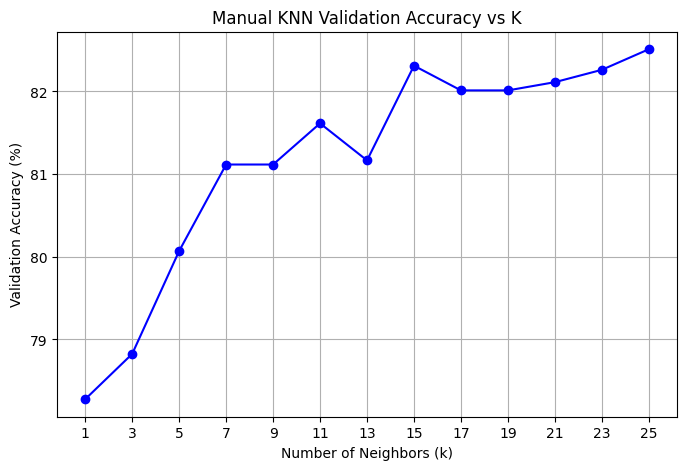

In [10]:
# list of odd k values 
ks = list(range(1, 26, 2))
val_accs_manual = []

for k in ks:
    # Initialize and train manual KNN
    knn_manual = KNN(k=k)       
    knn_manual.fit(x_train, y_train)
    
    # Predictions on test set
    y_knn_manual_pred = knn_manual.predict(x_test)
    
    # Accuracy calculation
    accuracy = accuracy_score(y_test, y_knn_manual_pred) * 100
    val_accs_manual.append(accuracy)
    
    print(f'Accuracy of manual model with k = {k} : {accuracy:.2f}%')

# Best k
best_indx_manual = int(np.argmax(val_accs_manual))
best_k_manual = ks[best_indx_manual]
print(f'\nBest k for manual model : {best_k_manual} with accuracy : {val_accs_manual[best_indx_manual]:.2f}%')

#  Plotting accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(ks, val_accs_manual, marker='o', color='b')
plt.title('Manual KNN Validation Accuracy vs K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy (%)')
plt.xticks(ks)
plt.grid(True)
plt.show()


# Training the manual model with the best k

In [11]:
# Train Manual model with the best k
knn_manual = KNN(k=best_k_manual)
knn_manual.fit(x_train, y_train)

# predict
y_pred_manual = knn_manual.predict(x_test)


# Confusion Matrix - Manual Model

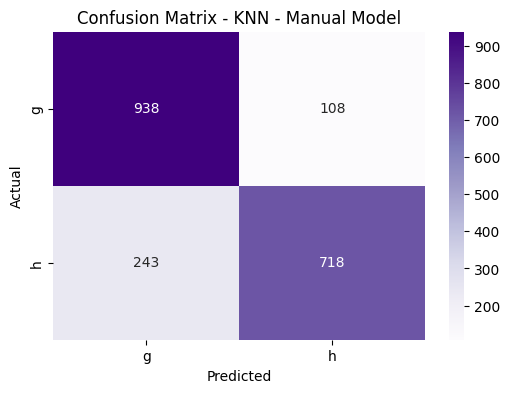

In [12]:
# Compute confusion matrix
cm_knn_manual = confusion_matrix(y_test, y_pred_manual)

# Get unique class labels
labels = np.unique(y_test)

# Plot confusion matrix for KNN
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn_manual, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN - Manual Model')
plt.show()

# KNN - Built-in Model

Accuracy of built-in model with k = 1 : 78.28%
Accuracy of built-in model with k = 3 : 78.82%
Accuracy of built-in model with k = 5 : 80.07%
Accuracy of built-in model with k = 7 : 81.12%
Accuracy of built-in model with k = 9 : 81.12%
Accuracy of built-in model with k = 11 : 81.61%
Accuracy of built-in model with k = 13 : 81.17%
Accuracy of built-in model with k = 15 : 82.31%
Accuracy of built-in model with k = 17 : 82.01%
Accuracy of built-in model with k = 19 : 82.01%
Accuracy of built-in model with k = 21 : 82.11%
Accuracy of built-in model with k = 23 : 82.26%
Accuracy of built-in model with k = 25 : 82.51%

Best k for built-in model : 25 with accuracy : 82.51%


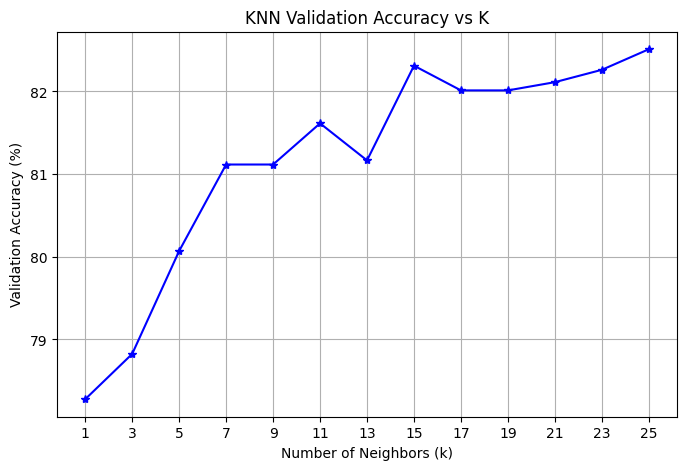

In [13]:
# list of odd k values 
ks = list(range(1,26,2))
val_accs_builtin = []

for k in ks:
    knn_builtin = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_builtin.fit(x_train, y_train)
    
    # predict
    y_knn_builtin_pred = knn_builtin.predict(x_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_knn_builtin_pred) * 100
    val_accs_builtin.append(accuracy)

    print(f'Accuracy of built-in model with k = {k} : {accuracy:.2f}%')
    
# Best k
best_indx = int(np.argmax(val_accs_builtin))
best_k_builtin = ks[best_indx]
print(f'\nBest k for built-in model : {best_k_builtin} with accuracy : {val_accs_builtin[best_indx]:.2f}%')

# Plotting acccuracy vs ks
plt.figure(figsize=(8,5))
plt.plot(ks, val_accs_builtin, marker='*', color='b')
plt.title('KNN Validation Accuracy vs K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy (%)')
plt.xticks(ks)
plt.grid(True)
plt.show()

# Training the built-in model with the best k

In [14]:
# Train Manual model with the best k
knn_builtin = KNeighborsClassifier(n_neighbors=best_k_builtin, metric='euclidean')
knn_builtin.fit(x_train, y_train)

# predict
y_pred_builtin = knn_builtin.predict(x_test)


# Confusion Matrix - Built-in Model

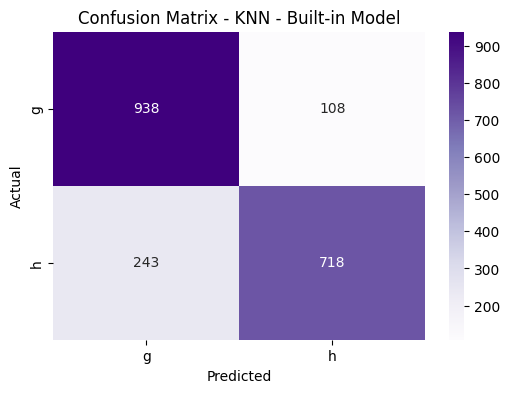

In [15]:
# Compute confusion matrix
cm_knn_builtin = confusion_matrix(y_test, y_pred_builtin)

# Get unique class labels
labels = np.unique(y_test)

# Plot confusion matrix for KNN
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn_builtin, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN - Built-in Model')
plt.show()

# Perfomance Evaluation

In [21]:
# Calculate performance metrics
accuracy_manual = accuracy_score(y_test, y_knn_manual_pred) * 100
precision_manual = precision_score(y_test, y_pred_manual, pos_label='g') * 100
recall_manual = recall_score(y_test, y_pred_manual, pos_label='g') * 100
f1_manual = f1_score(y_test, y_pred_manual, pos_label='g') * 100

accuracy_builtin = accuracy_score(y_test, y_knn_builtin_pred) * 100
precision_builtin = precision_score(y_test, y_pred_builtin, pos_label='g') * 100
recall_builtin = recall_score(y_test, y_pred_builtin, pos_label='g') * 100
f1_builtin = f1_score(y_test, y_pred_builtin, pos_label='g') * 100

# Print evaluation results
print(f'KNN Accuracy manual: {accuracy_manual:.2f}')
print(f'KNN Precision manual: {precision_manual:.2f}')
print(f'KNN Recall manual: {recall_manual:.2f}')
print(f'KNN F1-score manual: {f1_manual:.2f}')

print(f'\nKNN Accuracy sklearn: {accuracy_builtin:.2f}')
print(f'KNN Precision sklearn: {precision_builtin:.2f}')
print(f'KNN Recall sklearn: {recall_builtin:.2f}')
print(f'KNN F1-score sklearn: {f1_builtin:.2f}')

KNN Accuracy manual: 82.51
KNN Precision manual: 79.42
KNN Recall manual: 89.67
KNN F1-score manual: 84.24

KNN Accuracy sklearn: 82.51
KNN Precision sklearn: 79.42
KNN Recall sklearn: 89.67
KNN F1-score sklearn: 84.24


# Conclusion 
### Best K for both Manual and sklearn built-in Models was : k = 25 
